In [16]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

#EXP_NAME = "tolerance/15"
headers = ['time', 'similarity']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))
        client_data.loc[(client_data['similarity'] > 1)] = 1
        data = data.append(client_data)
    data = data.groupby(data.index).mean()
    return data


In [17]:
def getECDF(df):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df.similarity.value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf


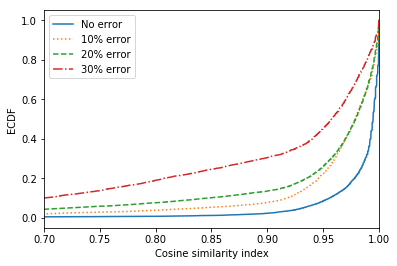

In [48]:
headers = ['time', 'similarity']

data0 = read_clients("faulty/0%/sim")
#data10 = read_clients("faulty/10/sim")
data10 = read_clients("faulty/10%/sim")
data20 = read_clients("faulty/20%/sim1")
data30 = read_clients("faulty/30%/sim")
styles=['-', ':', '--','-.']

#data_im = read_clients("im/sim")

getECDF(data0).plot(style=styles[0])
getECDF(data10).plot(style=styles[1])
getECDF(data20).plot(style=styles[2])
getECDF(data30).plot(style=styles[3])

plt.legend(['No error', '10% error', '20% error', '30% error'])
plt.xlim(0.7)
plt.xlabel('Cosine similarity index')
plt.ylabel('ECDF')
plt.show()

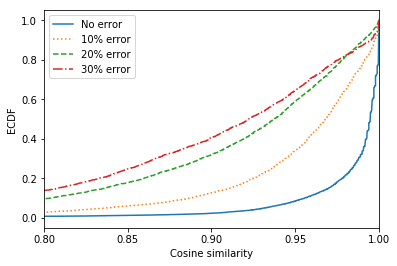

In [50]:
##### headers = ['time', 'similarity']

data0 = read_clients("faulty/0%/sim")
#data10 = read_clients("faulty/10/sim")
data10l = read_clients("faulty/10_low/sim")
data20l = read_clients("faulty/20_low/sim")
data30l = read_clients("faulty/30_low/sim")

styles=['-', ':', '--','-.']
#data_im = read_clients("im/sim")

ax = getECDF(data0).plot(style=styles[0])
getECDF(data10l).plot(style=styles[1], ax=ax)
getECDF(data20l).plot(style=styles[2], ax= ax)
getECDF(data30l).plot(style=styles[3], ax = ax)

plt.legend(['No error', '10% error', '20% error', '30% error'])
plt.xlabel('Cosine similarity')
plt.ylabel('ECDF')
ax.xaxis.set_ticks([0.8, 0.85,  0.9, 0.95,  1.0])
plt.xlim(0.8)

plt.show()

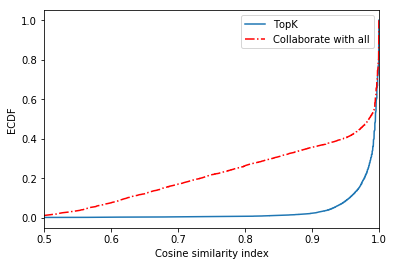

In [23]:
headers = ['time', 'similarity']

data0 = read_clients("faulty/0%/sim")
#data10 = read_clients("faulty/10/sim")
data10l = read_clients("im/r1/sim")
styles=['-','-.']
#data_im = read_clients("im/sim")

getECDF(data0).plot(style=styles[0])
getECDF(data10l).plot(style=styles[1], color='red')

plt.legend(['TopK', 'Collaborate with all'])
plt.xlabel('Cosine similarity index')
plt.ylabel('ECDF')
plt.xlim(0.5)

plt.show()

In [24]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

#EXP_NAME = "tolerance/15"
headers = ['time', 'gateway','latency','actual_latency','sender']

#Read input files from the directory and returns DataTable object in a combined list
def read_gw_table(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        
        #client_data['time'] = pd.to_datetime(client_data['time'])
        client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))
        client_data.index = client_data.index.map(lambda x: x.replace(second=0))
        data = data.append(client_data)

    return data


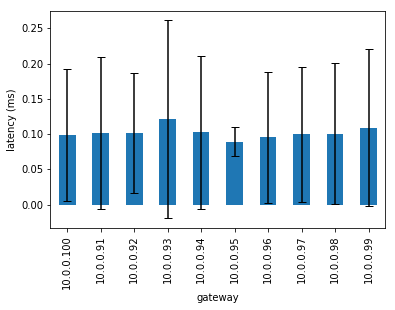

In [25]:
def getECDF1(df):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df.latency.value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf

data = read_gw_table("cpu_bw/cpu_var/gw_table")
data = read_gw_table("faulty/10%/gw_table")
#for name, group in data.groupby('gateway'):
#data = data.quantile(0.9, numeric_only=False)
#print(data)
means = data.groupby('gateway').mean()
errors = data.groupby('gateway').std()
fig, ax = plt.subplots()
means['latency'].plot.bar(yerr=errors, ax=ax, capsize=4)
plt.ylabel('latency (ms)')
#plt.ylim(0,0.2)
plt.show()

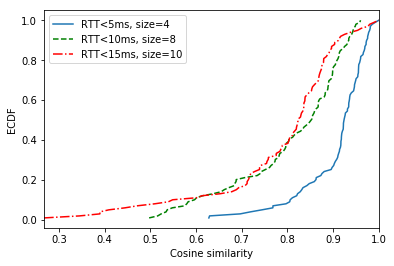

In [26]:
def getECDF2(df, name):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df[name].value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf

headers = ['round', 'size=4','size=8','size=10']
size = pd.read_csv('size.csv', sep=',')
size.columns = headers
size = size.set_index(size['round'])

styles=['-', ':', '--','-.']

getECDF2(size, 'size=4').plot(style=styles[0])
getECDF2(size, 'size=8').plot(color='green',style=styles[2])
getECDF2(size, 'size=10').plot(color='red',style=styles[3])



plt.legend(['RTT<5ms, size=4','RTT<10ms, size=8','RTT<15ms, size=10'])
plt.xlabel('Cosine similarity')
plt.ylabel('ECDF')
plt.show()

In [4]:
#data = read_gw_table("cpu_bw/gw_change/gw_change1")
#data =data.query('gateway == "10.0.0.93"')
#data.groupby(data.index).mean().to_csv('change.csv')
data = pd.read_csv('change.csv')
#print(data)
styles=['-', '--']

data[['latency','actual_latency']].plot(style=styles)
plt.ylabel('Mean latency (ms)')
plt.xlabel('Rounds')
plt.legend(['Estimated latency', 'Actual latency'])
plt.show()


IOError: [Errno 2] File change.csv does not exist: 'change.csv'

In [27]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import random

EXP_NAME = "cpu_bw/node_change/sim"
headers = ['time', 'similarity','gateways','collaborators']

#Read input files from the directory and returns DataTable object in a combined list
def read_sim(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))    
        client_data.index = client_data.index.map(lambda x: x.replace(second=0))
        client_data.loc[(client_data['similarity'] > 1)] = 1
        #client_data.loc[(client_data['similarity'] < 0.8)] = random.uniform(0.6,0.88)
        data = data.append(client_data)
    data = data.groupby(data.index).mean()
    return data

#sim_data = read_sim(EXP_NAME)
#sim_data10 = read_sim("cpu_bw/node_change/sim10")
#sim_data20 = read_sim("cpu_bw/node_change/sim20")

#sim_data.to_csv('sim_change.csv')
#sim_data10.to_csv('sim_change1.csv')
#sim_data20.to_csv('sim_change2.csv')

def getECDF3(df, name):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df[name].value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf

In [28]:
getECDF3(sim_data,'gateways').plot()
getECDF3(sim_data10,'gateways').plot()
getECDF3(sim_data20,'gateways').plot()
plt.show()
getECDF3(sim_data,'similarity').plot()
getECDF3(sim_data10,'similarity').plot()
getECDF3(sim_data20,'similarity').plot()
plt.xlim(0.8)

plt.show()


NameError: name 'sim_data' is not defined

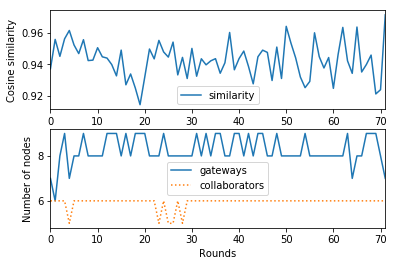

In [9]:
d = pd.read_csv('periodic_link_down.csv')
fig, axes = plt.subplots(nrows=2, ncols=1)

d[['similarity']].plot(ax=axes[0])
d[['gateways','collaborators']].plot(ax=axes[1], style=['-', ':'])
axes[0].set_ylabel('Cosine similarity')
axes[1].set_ylabel('Number of nodes')

plt.xlabel('Rounds')
plt.show()

          senseCount  sendCount  receiveCount  gateways
gateways                                               
5                2.0        3.0      3.371326         5
10               2.0        6.0      6.160417        10
15               2.0        8.0      8.145689        15


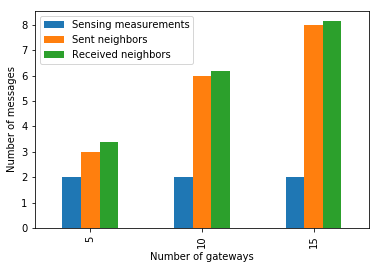

In [29]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

headers = ['time', 'senseCount','sendCount','receiveCount']

#Read input files from the directory and returns DataTable object in a combined list
def read_count(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))
        client_data.index = client_data.index.map(lambda x: x.replace(second=0))
        #client_data.loc[(client_data['receiveCount'] > 10)] = 10
        client_data.loc[(client_data['senseCount'] > 2)] = 2
        data = data.append(client_data)
    data = data.groupby(data.index).mean()
    return data

count_data = read_count('cost/gw5')
count_data1 = read_count('cost/gw10')
count_data2 = read_count('cost/gw15')

#print(count_data)
#print(count_data)
temp = pd.DataFrame(count_data.mean()).T
temp = temp.append(pd.DataFrame(count_data1.mean(axis=0)).T)
temp = temp.append(pd.DataFrame(count_data2.mean(axis=0)).T)

idx = pd.Int64Index([5, 10, 15])
temp['gateways'] = idx

temp = temp.set_index(temp['gateways'])


print(temp)


ax = temp[['senseCount','sendCount','receiveCount']].plot.bar()
plt.xlabel('Number of gateways')
plt.ylabel('Number of messages')
plt.legend(['Sensing measurements','Sent neighbors', 'Received neighbors'])
plt.show()

In [30]:
headers = ['time', 'gateway','latency','receiver','sender']
data_c = read_gw_table('capacity/test3')
data_c.to_csv('log_general.csv')
print(data_c.head())

                                    time    gateway   latency  receiver  \
time                                                                      
2019-05-14 12:24:00  2019-05-14 12:24:56  10.0.0.91  0.121000     0.121   
2019-05-14 12:26:00  2019-05-14 12:26:26  10.0.0.99  0.146000     0.149   
2019-05-14 12:26:00  2019-05-14 12:26:26  10.0.0.98  0.125333     0.117   
2019-05-14 12:26:00  2019-05-14 12:26:26  10.0.0.95  0.125667     0.139   
2019-05-14 12:26:00  2019-05-14 12:26:26  10.0.0.94  0.177667     0.150   

                        sender  
time                            
2019-05-14 12:24:00  10.0.0.27  
2019-05-14 12:26:00  10.0.0.30  
2019-05-14 12:26:00  10.0.0.27  
2019-05-14 12:26:00  10.0.0.28  
2019-05-14 12:26:00  10.0.0.27  


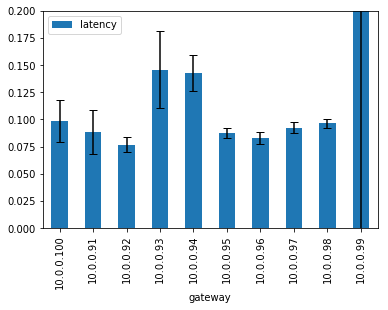

('10.0.0.100', 0.01969212911715682, 0.09850321463350002)
('10.0.0.91', 0.020119596957340762, 0.08834762657624248)
('10.0.0.92', 0.006856630311177311, 0.07663469696557838)
('10.0.0.93', 0.03537711705245689, 0.1457249369225385)
('10.0.0.94', 0.01694676227464677, 0.14265168556509755)
('10.0.0.95', 0.0046235403764401, 0.08772802656977317)
('10.0.0.96', 0.005542360695262793, 0.08302881462439443)
('10.0.0.97', 0.00498047186979598, 0.09231107875882955)
('10.0.0.98', 0.004159436406794998, 0.09624957234760789)
('10.0.0.99', 1.7171413114842322, 0.6684466270787307)


In [31]:
headers = ['time', 'gateway','latency','receiver','sender']

data_capa = pd.read_csv('capacity/test3/gw_table_10.0.0.5')
data_capa.columns= headers
grouped = data_capa.groupby('gateway')


errors = data_capa.groupby('gateway').std()

fig, ax = plt.subplots()
grouped.mean()[['latency']].plot.bar(yerr=errors, ax=ax, capsize=4)
plt.ylim(0,0.2)
plt.show()

for name, group in grouped:
    print(name, group['latency'].std(),group['latency'].mean())
    


10.0.0.100


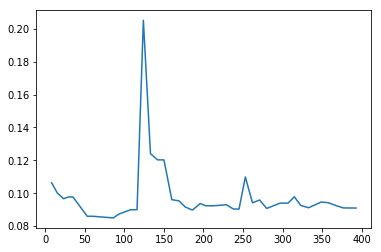

10.0.0.91


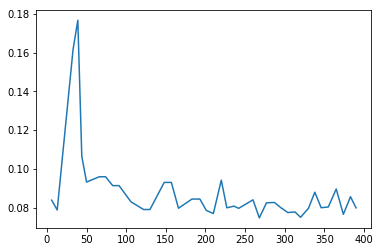

10.0.0.92


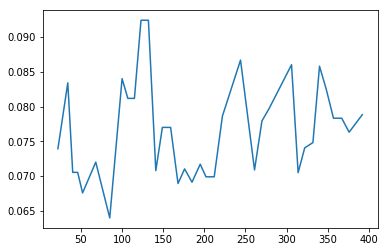

10.0.0.93


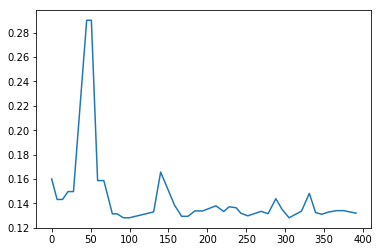

10.0.0.94


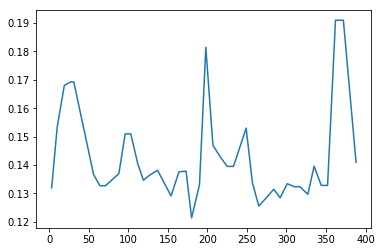

10.0.0.95


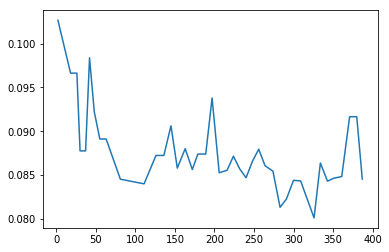

10.0.0.96


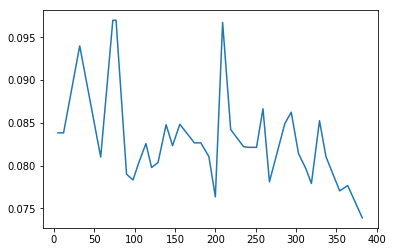

10.0.0.97


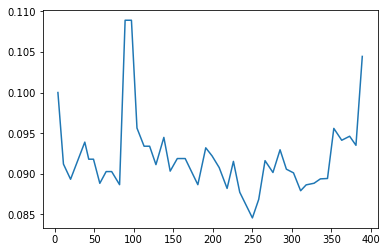

10.0.0.98


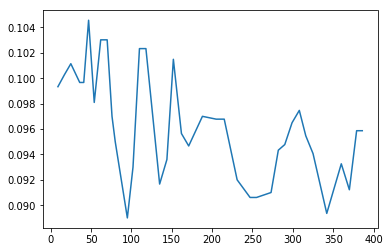

10.0.0.99


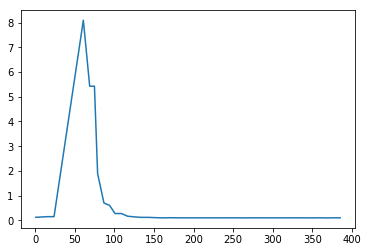

In [66]:
grouped = data_capa.groupby('gateway')
legend = []
for name, group in grouped:
    print(name)
    group['latency'].plot()
    #plt.ylim(0, 0.2)
    plt.show()

#plt.legend(legend)
#plt.ylim(0, 0.2)
#plt.show()

In [32]:
tree_dir = "tree1"
INPUT_DIR = os.path.join( os.getcwd(), tree_dir)

headers = ['time', 'similarity','gateways','collaborators']
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
tree_data = pd.DataFrame()
for d in dirs:
    int_dir = os.path.join(INPUT_DIR, d,'sim')
    data = read_sim(int_dir)
    tree_data = tree_data.append(data)

print(tree_data.describe())
    

       similarity    gateways  collaborators
count  120.000000  120.000000     120.000000
mean     0.955531    6.129371      11.353082
std      0.051329    0.995303       0.946390
min      0.629200    4.166667       7.944444
25%      0.958193    5.448611      10.805060
50%      0.966893    5.923188      11.421937
75%      0.975625    6.756944      12.157895
max      0.991389    8.466667      13.210526


In [33]:
custom_dir = "custom1"

headers = ['time', 'similarity','gateways','collaborators']
INPUT_DIR = os.path.join( os.getcwd(), custom_dir)
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
custom_data = pd.DataFrame()
for d in dirs:
    int_dir = os.path.join(INPUT_DIR, d,'sim')
    data = read_sim(int_dir)
    custom_data = custom_data.append(data)

In [34]:
im_dir = "im"

headers = ['time', 'similarity','gateways','collaborators']
INPUT_DIR = os.path.join( os.getcwd(), custom_dir)
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
im_data = pd.DataFrame()
data10l['gateways']=7
data10l['collaborators'] = 8
im_data = im_data.append(data10l)

for d in dirs:
    if d == 'r1':
        continue
    int_dir = os.path.join(INPUT_DIR, d,'sim')
    data = read_sim(int_dir)
    im_data = im_data.append(data)

In [35]:
im_dir = "im_old"

headers = ['time', 'similarity']
im_data = pd.DataFrame()
im_data = read_clients(im_dir)


       similarity
count  721.000000
mean     0.835320
std      0.134797
min      0.438217
25%      0.678415
50%      0.903616
75%      0.948056
max      0.996127
       similarity    gateways  collaborators
count  574.000000  574.000000     574.000000
mean     0.918758    4.973440       9.094897
std      0.080889    1.731415       1.801158
min      0.470167    1.000000       1.000000
25%      0.883693    3.777778       8.006250
50%      0.944682    5.102632       9.077381
75%      0.971920    6.500000      10.047078
max      1.000000    8.678571      14.000000


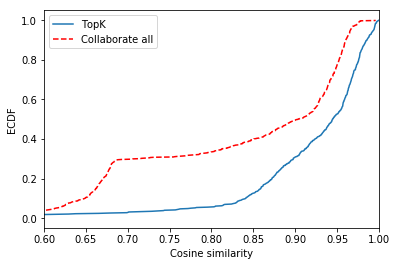

In [52]:
styles=['-', ':', '--','-.']
#getECDF3(tree_data,'similarity').plot(color='green', style = styles[0])
#getECDF3(custom_data,'similarity').plot(color='blue', style=styles[1])

combined_tree_data = tree_data.append(custom_data)

combined_tree_data = combined_tree_data.groupby(combined_tree_data.index).mean()


getECDF3(combined_tree_data, 'similarity').plot(style=styles[0])
getECDF3(im_data, 'similarity').plot(color='red', style=styles[2])

print(im_data.describe())
print(combined_tree_data.describe())
#print(custom_data.describe())

plt.xlabel('Cosine similarity')
plt.ylabel('ECDF')
plt.xlim(0.6,1)

plt.legend(['TopK', 'Collaborate all'])
plt.show()

In [41]:
headers = ['sender','time','text','status']
gw_dir = "gw_log/15"

INPUT_DIR = os.path.join( os.getcwd(), gw_dir)
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
gw_data = pd.DataFrame()
cnt = 0
avg = 0
for d in dirs:
    if d.startswith(".~"):
        continue
    data = pd.read_csv(os.path.join(INPUT_DIR, d), sep=',')
    data.columns = headers
    data = data.set_index(pd.DatetimeIndex(data['time']))
    data.index = data.index.map(lambda x: x.replace(second=0))   
    data = data.groupby([data.index]).count()
    avg += data['sender'].mean()
    cnt+=1

print(avg/cnt)

10.762344720496895


          senseCount  sendCount  receiveCount  gwMeasurements
gateways                                                     
5                  2          3          3.54           33.88
10                 2          6          6.24           17.80
15                 2          8          8.22           10.76


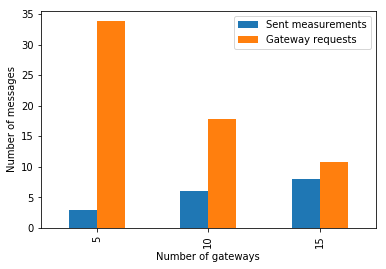

In [62]:
data = pd.read_csv("cost_sensitivity.csv", index_col='gateways')
print(data)
ax = data[['sendCount','gwMeasurements']].plot.bar()
plt.xlabel('Number of gateways')
plt.ylabel('Number of messages')
plt.legend(['Sent measurements','Gateway requests'], 
           loc='upper right')
#for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.015))
plt.show()

In [12]:
headers = ['sender','time','text','status']
gw_dir = "cap"

INPUT_DIR = os.path.join( os.getcwd(), gw_dir)
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
gw_data = pd.DataFrame()
cnt = 0
avg = 0
for d in dirs:
    if d.startswith(".~"):
        continue
    print(d)
    data = pd.read_csv(os.path.join(INPUT_DIR, d), sep=',')
    data.columns = headers
    data = data.set_index(pd.DatetimeIndex(data['time']))
    data.index = data.index.map(lambda x: x.replace(second=0))   
    data = data.groupby([data.index]).count()
    avg += data['sender'].mean()
    cnt+=1

print(avg/cnt)

log96
log99
log91
log98
log92
log95
5.09514581026209


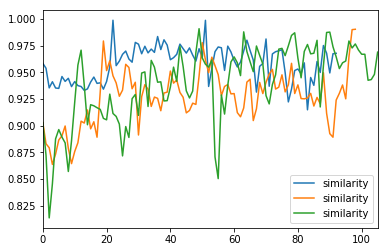

           round  similarity   gateways  neighbors
count  93.000000   93.000000  93.000000  93.000000
mean   47.000000    0.957997  12.990755   5.123114
std    26.990739    0.016483   1.729322   0.307671
min     1.000000    0.914833   2.133333   3.300000
25%    24.000000    0.944367  12.933333   5.166667
50%    47.000000    0.960500  13.233333   5.166667
75%    70.000000    0.970033  13.600000   5.200000
max    93.000000    0.998800  14.400000   5.344828
           round  similarity   gateways  neighbors
count  99.000000   99.000000  99.000000  99.000000
mean   50.000000    0.926852  10.094147  10.227601
std    28.722813    0.026004   1.762992   0.641919
min     1.000000    0.863625   3.333333   8.272727
25%    25.500000    0.913081   9.319079   9.750000
50%    50.000000    0.930056  10.137931  10.375000
75%    74.500000    0.940725  10.952851  10.966667
max    99.000000    0.990333  15.900000  11.000000
            round  similarity    gateways   neighbors
count  106.000000  106.00000

In [10]:
data5 = pd.read_csv("sensitivity/rtt5.csv", sep=',')
data15 = pd.read_csv("sensitivity/rtt15.csv", sep=',')
data20 = pd.read_csv("sensitivity/rtt20.csv", sep=',')

ax = data5[['similarity']].plot()
data15[['similarity']].plot(ax =ax)
data20[['similarity']].plot(ax =ax)

plt.show()

print(data5.describe())
print(data15.describe())
print(data20.describe())

# GATEWAY TABLE RMSE

In [129]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

EXP_NAME = "faulty/0%/gw_table/"
headers = ['time','gateway', 'estimated','actual','sender']

#Read input files from the directory and returns DataTable object in a combined list
def read_gwtable(EXP_NAME):    
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))
        data = data.append(client_data)
    data = data.dropna()
    return data

data = read_gwtable(EXP_NAME)

               rmse
count  10079.000000
mean      17.820486
std       47.032793
min        0.000000
25%        0.000375
50%        0.001321
75%        0.016165
max     1618.633598


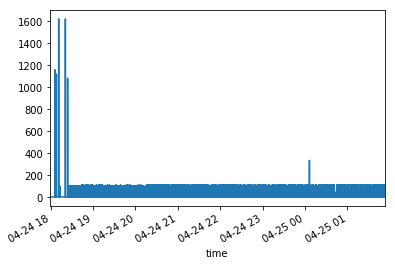

In [130]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_df = pd.DataFrame(columns=['time','rmse'])
for name, group in data.groupby(data.index):
    mse_df = mse_df.append(
        pd.Series({'time':name, 'rmse':mean_squared_error(group['actual'], group['estimated'])})
                           , ignore_index=True)
mse_df = mse_df.set_index(pd.DatetimeIndex(mse_df['time']))
print(mse_df.describe())
mse_df['rmse'].plot()
plt.show()